<a href="https://colab.research.google.com/github/NingDin/Collections-of-topics/blob/main/Rolling%20Bayesian%20Regression%20%20%20%2013_b_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bayesian Regression

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

In [ ]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
np.random.seed(1000)
%config InlineBackend.figure_format = 'svg'

<ipython-input-2-7e8840e2fb5e>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Introductory Example

In [ ]:
x = np.linspace(0, 10, 500)
y = 4 + 2 * x + np.random.standard_normal(len(x)) * 2 ## we yse MSE point estimate to start

In [ ]:
reg = np.polyfit(x, y, 1)

In [ ]:
reg# [0] for x [1] for constant ; from high degree to 0

array([2.03384161, 3.77649234])

Text(0, 0.5, 'y')

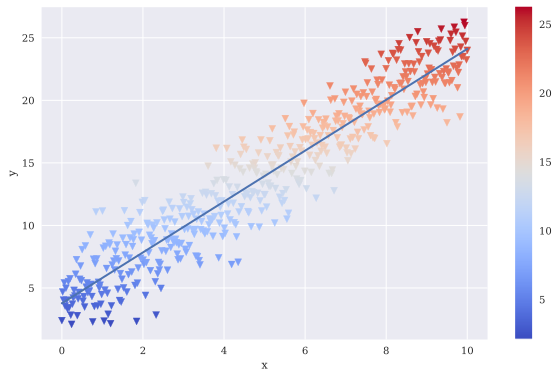

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=y, marker='v', cmap='coolwarm')
plt.plot(x, reg[1] + reg[0] * x, lw=2.0)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
# plt.savefig('../../images/ch13/stat_15.png');

In [ ]:
import warnings; warnings.simplefilter('ignore')

In [ ]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 1000
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

To install `pymc3` on Mac, use:

    conda install -c conda-forge mkl pymc3 theano-pymc

In [ ]:
import pymc as pm # note we are using pymc5 here instead of pymc3 

In [ ]:
%%time
basic_model=pm.Model()
with basic_model:
    # model
    # 加入先验几率 alpha to sigma
    alpha = pm.Normal('alpha', mu=0, sigma=20) # our prior assumption # note here in pymc 5 is sigma instead of sd 
    beta = pm.Normal('beta', mu=0, sigma=10)  # if it is polymonimal we need add shape=degree of polynominal
    sigma = pm.Uniform('sigma', lower=0, upper=10)  # if we give large sigma we basicly saying we dont know exact distribution# uniform is author assumption
    # we can use pm.HalfNormal instead as well
    # expected value of outcome


    y_est = alpha + beta * x  #写进模型


    #Likelihood (sampling distribution) of observations
    Y_obs= pm.Normal('Y_obs', mu=y_est, sigma=sigma,
                           observed=y)  # note here y is the observation y = 4 + 2 * x + np.random.standard_normal(len(x)) * 2 ## we yse MSE point estimate to start
    #y_obs 写进likelyhood, Y_obs variable equal to Y_obs pramater and observed equal to y function above
    # # inference
    # # start = pm.find_MAP()  
    # # step = pm.NUTS()  
    # trace = pm.sample(100, tune=1000,
    #                   progressbar=True) 

CPU times: user 63.3 ms, sys: 8.35 ms, total: 71.7 ms
Wall time: 1.42 s


We call the pm.Normal constructor to create a random variable to use as a normal prior. The first argument is always the name of the random variable, which should almost always match the name of the Python variable being assigned to, since it is sometimes used to retrieve the variable from the model for summarizing output. The remaining required arguments for a stochastic object are the parameters, in this case mu, the mean, and sigma, the standard deviation, which we assign hyperparameter values for the model. In general, a distribution’s parameters are values that determine the location, shape or scale of the random variable, depending on the parameterization of the distribution. Most commonly-used distributions, such as Beta, Exponential, Categorical, Gamma, Binomial and many others, are available in PyMC.

In [ ]:
# note the sequence declare alpha to sigma do matter
#The final line of the model defines Y_obs, the sampling distribution of the outcomes in the dataset.


In [ ]:
with basic_model:
  #draw 1000 posterior samples as defulat
  idata=pm.sample(100,tune=1000) # first 1000 will be abandon to gain Markov stablization

In [ ]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [ ]:
idata.posterior.alpha.values.shape

(2, 100)

In [ ]:
idata.posterior.alpha.values[1]

array([3.62005895, 3.67112425, 3.75404475, 3.47550891, 3.49580211,
       3.92407208, 3.89107504, 3.89107504, 3.72090058, 4.05008749,
       3.94204061, 3.9763677 , 3.82302987, 3.87963171, 3.80396381,
       3.98510436, 3.78496812, 3.58874701, 3.76038747, 3.86673717,
       3.66498446, 3.64719542, 3.56210491, 3.89093597, 3.89197656,
       3.78544911, 3.98020341, 3.58293258, 3.58441622, 3.47061892,
       3.63294111, 3.95973553, 3.86886789, 3.91288272, 3.75457364,
       3.65567135, 3.96410265, 3.77303329, 3.53298431, 3.47073844,
       3.61139373, 3.64759024, 3.6461492 , 3.83862849, 3.92423892,
       3.71918319, 3.94444101, 3.94444101, 3.67711953, 3.37020981,
       3.63152636, 3.94355947, 3.61730916, 3.57455999, 3.78678487,
       3.7709229 , 3.90067466, 3.83752953, 3.87148504, 3.82824674,
       3.71383361, 3.70332855, 3.72508375, 3.76415712, 3.68236847,
       3.69114546, 3.84732703, 3.98321146, 3.95161455, 3.91087385,
       3.61966349, 3.67306857, 3.34347273, 4.02513572, 3.52715

In [ ]:
idata.posterior.alpha.values[1].shape

(100,)

In [ ]:
type(idata.posterior.alpha.values[1])

numpy.ndarray

In [ ]:
pm.sample? # chains : int recomand 4 or above

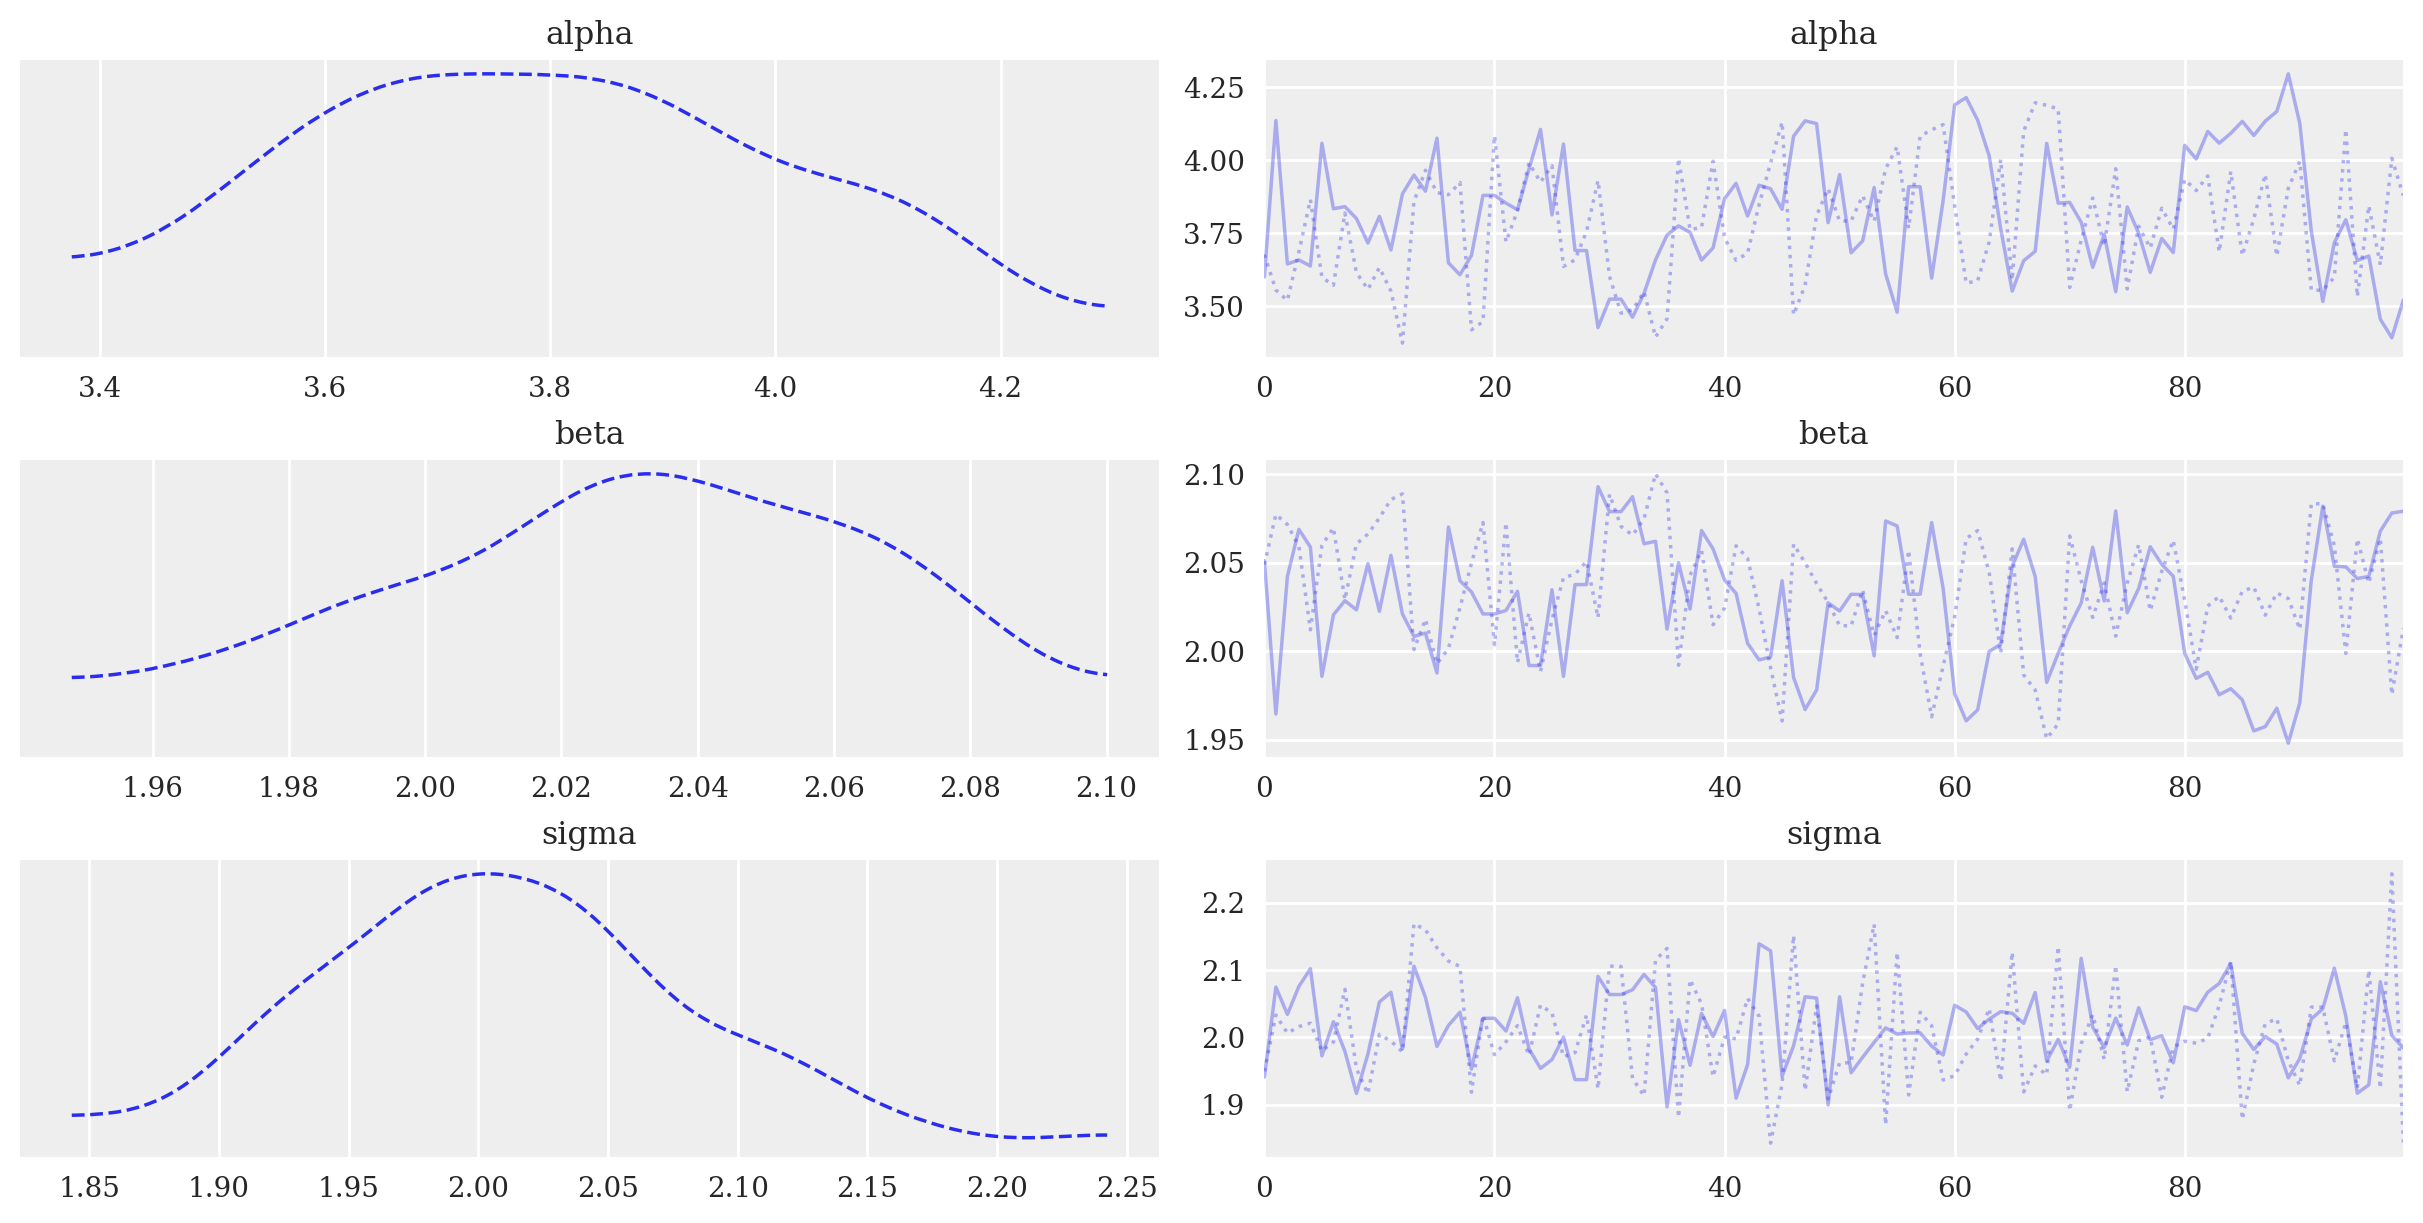

In [ ]:
az.plot_trace(idata, combined=True);

The left column consists of a smoothed histogram (using kernel density estimation) of the marginal posteriors of each stochastic random variable while the right column contains the samples of the Markov chain plotted in sequential order. The beta variable, being vector-valued, produces two density plots and two trace plots, corresponding to both predictor coefficients.

The various attributes of the InferenceData object can be queried in a similar way to a dict containing a map from variable names to numpy.arrays. For example, we can retrieve the sampling trace from the alpha latent variable by using the variable name as an index to the idata.posterior attribute. The first dimension of the returned array is the chain index, the second dimension is the sampling index, while the later dimensions match the shape of the variable. We can see the first 5 values for the alpha variable in each chain as follows:

In [ ]:
idata.posterior["alpha"].sel(draw=slice(0, 4)) # print out result can be compare to MSE point estimate

<xarray.DataArray 'alpha' (chain: 2, draw: 5)>
array([[3.60067895, 4.13545881, 3.64483056, 3.6585683 , 3.63780474],
       [3.67721001, 3.5555101 , 3.52016759, 3.68621326, 3.86525267]])
Coordinates:
  * chain    (chain) int64 0 1
  * draw     (draw) int64 0 1 2 3 4

In [ ]:
idata.posterior.alpha[1]

<xarray.DataArray 'alpha' (draw: 100)>
array([3.67721001, 3.5555101 , 3.52016759, 3.68621326, 3.86525267,
       3.59913219, 3.57186748, 3.8189474 , 3.61557882, 3.55802816,
       3.63266474, 3.5516634 , 3.37415849, 3.85875163, 3.96549568,
       3.8888101 , 3.88183588, 3.92352932, 3.41937144, 3.44775814,
       4.08367626, 3.72052698, 3.8274701 , 3.99062951, 3.92494279,
       3.98103502, 3.63634095, 3.65910385, 3.75550855, 3.93064783,
       3.60195016, 3.47644807, 3.48772074, 3.54993331, 3.39455857,
       3.45759309, 4.0064018 , 3.76215537, 3.77022345, 3.99624301,
       3.73371428, 3.65728786, 3.68175396, 3.84764198, 3.99045719,
       4.13033334, 3.47072324, 3.57218324, 3.810098  , 3.90289726,
       3.79182068, 3.79182068, 3.87834834, 3.79075984, 3.97071258,
       4.0455667 , 3.7671977 , 4.08200568, 4.1038893 , 4.12148259,
       3.84357309, 3.57933594, 3.58713578, 3.72060237, 4.00227249,
       3.58938633, 4.09961507, 4.19667621, 4.18777464, 4.17485289,
       3.56449086, 3.72655277, 3.87063288, 3.7057434 , 3.97062546,
       3.55924656, 3.77376823, 3.69946021, 3.83554374, 3.76409173,
       3.93357197, 3.89609541, 3.94594377, 3.68611476, 3.96126575,
       3.67349676, 3.79911656, 3.95141491, 3.67196789, 3.90362067,
       3.99583756, 3.55524645, 3.55524645, 3.59885737, 4.1046394 ,
       3.53316533, 3.84423692, 3.64178645, 4.00659076, 3.8789058 ])
Coordinates:
    chain    int64 1
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99

In [ ]:
idata.posterior.alpha[1].shape

(100,)

In [ ]:
type(idata.posterior.beta[1])

xarray.core.dataarray.DataArray

In [ ]:
len(idata.posterior.alpha[1])

100

In [ ]:
az.summary(idata, round_to=3)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  3.739  0.174   3.343    3.985      0.018    0.012   101.922    95.237   
beta   2.041  0.032   1.987    2.106      0.003    0.002   101.621   120.811   
sigma  2.004  0.073   1.872    2.140      0.006    0.004   142.296    95.341   

       r_hat  
alpha  1.005  
beta   1.007  
sigma  0.998

If we wanted to use the slice sampling algorithm to sigma instead of NUTS (which was assigned automatically), we could have specified this as the step argument for sample.

In [ ]:
with basic_model:
    # instantiate sampler
    step = pm.Slice()

    # draw 5000 posterior samples
    slice_idata = pm.sample(5000, step=step)

Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 9 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics

In [ ]:
#@title Default title text
pm.summary(trace)  

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  3.804  0.159   3.522    4.120      0.021    0.015      65.0      78.0   
beta   2.028  0.028   1.981    2.082      0.003    0.002      91.0     122.0   
sigma  2.012  0.058   1.915    2.117      0.005    0.003     142.0     185.0   

       r_hat  
alpha   1.03  
beta    1.01  
sigma   1.01

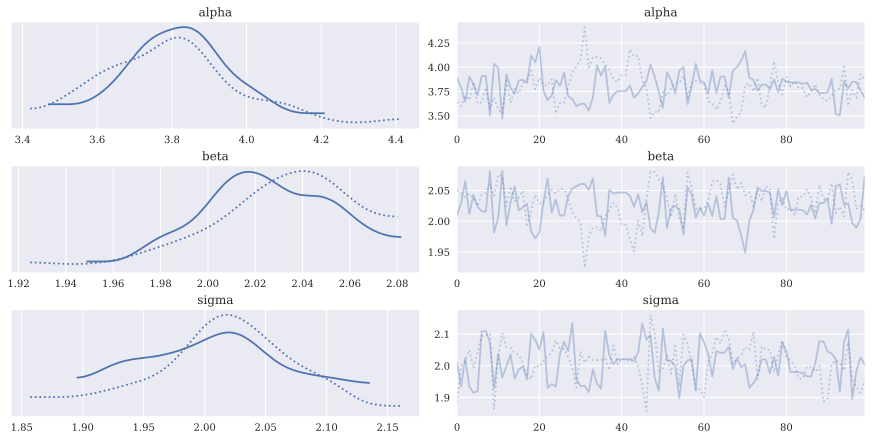

In [ ]:
pm.traceplot(trace, lines={'alpha': 4, 'beta': 2, 'sigma': 2});  
# plt.savefig('../../images/ch13/stat_16.png');

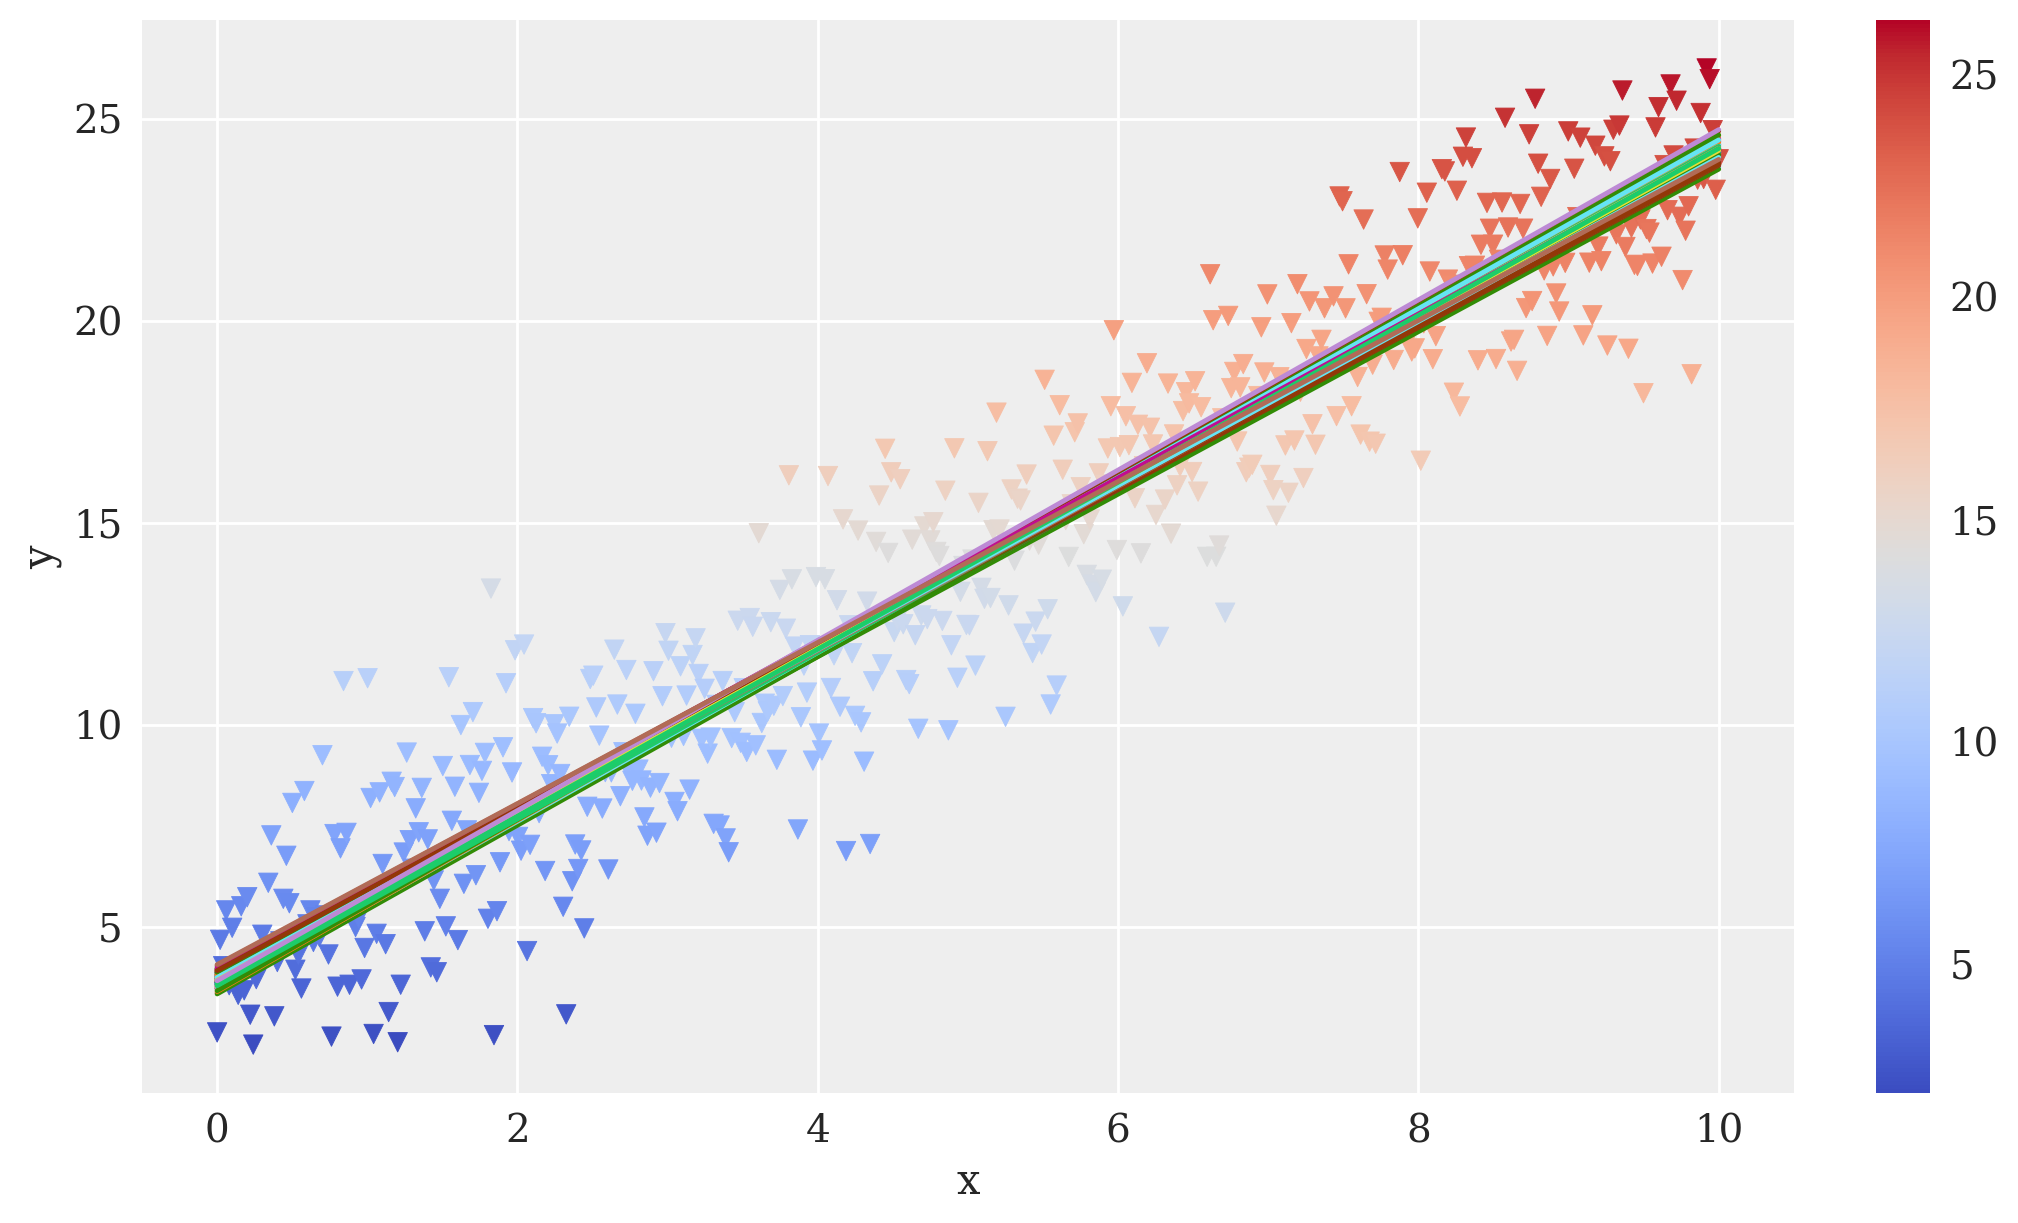

In [ ]:
plt.figure(figsize=(10, 6))  # note here is the limitation ----we only used one chain
plt.scatter(x, y, c=y, marker='v', cmap='coolwarm')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
for i in range(len(idata.posterior.alpha.values[1])):
    plt.plot(x, idata.posterior.alpha.values[1][i] + idata.posterior.beta.values[1][i] * x);
# plt.savefig('../../images/ch13/stat_17.png');

### Two Financial Instruments

In [ ]:
raw = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True)

In [ ]:
data = raw[['GDX', 'GLD']].dropna()

In [ ]:
data = data / data.iloc[0]  

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDX     2138 non-null   float64
 1   GLD     2138 non-null   float64
dtypes: float64(2)
memory usage: 50.1 KB


In [ ]:
data

GDX       GLD
Date                          
2010-01-04  1.000000  1.000000
2010-01-05  1.009642  0.999089
2010-01-06  1.034165  1.015574
2010-01-07  1.029134  1.009290
2010-01-08  1.044645  1.014299
...              ...       ...
2018-06-25  0.461329  1.091894
2018-06-26  0.460071  1.086157
2018-06-27  0.457137  1.079964
2018-06-28  0.459652  1.076685
2018-06-29  0.467617  1.080601

[2138 rows x 2 columns]

In [ ]:
data.iloc[-1] / data.iloc[0] - 1  

GDX   -0.532383
GLD    0.080601
dtype: float64

In [ ]:
data.corr()  # note doesn't has to be log as long is normalized it will be fine

GDX      GLD
GDX  1.00000  0.71539
GLD  0.71539  1.00000

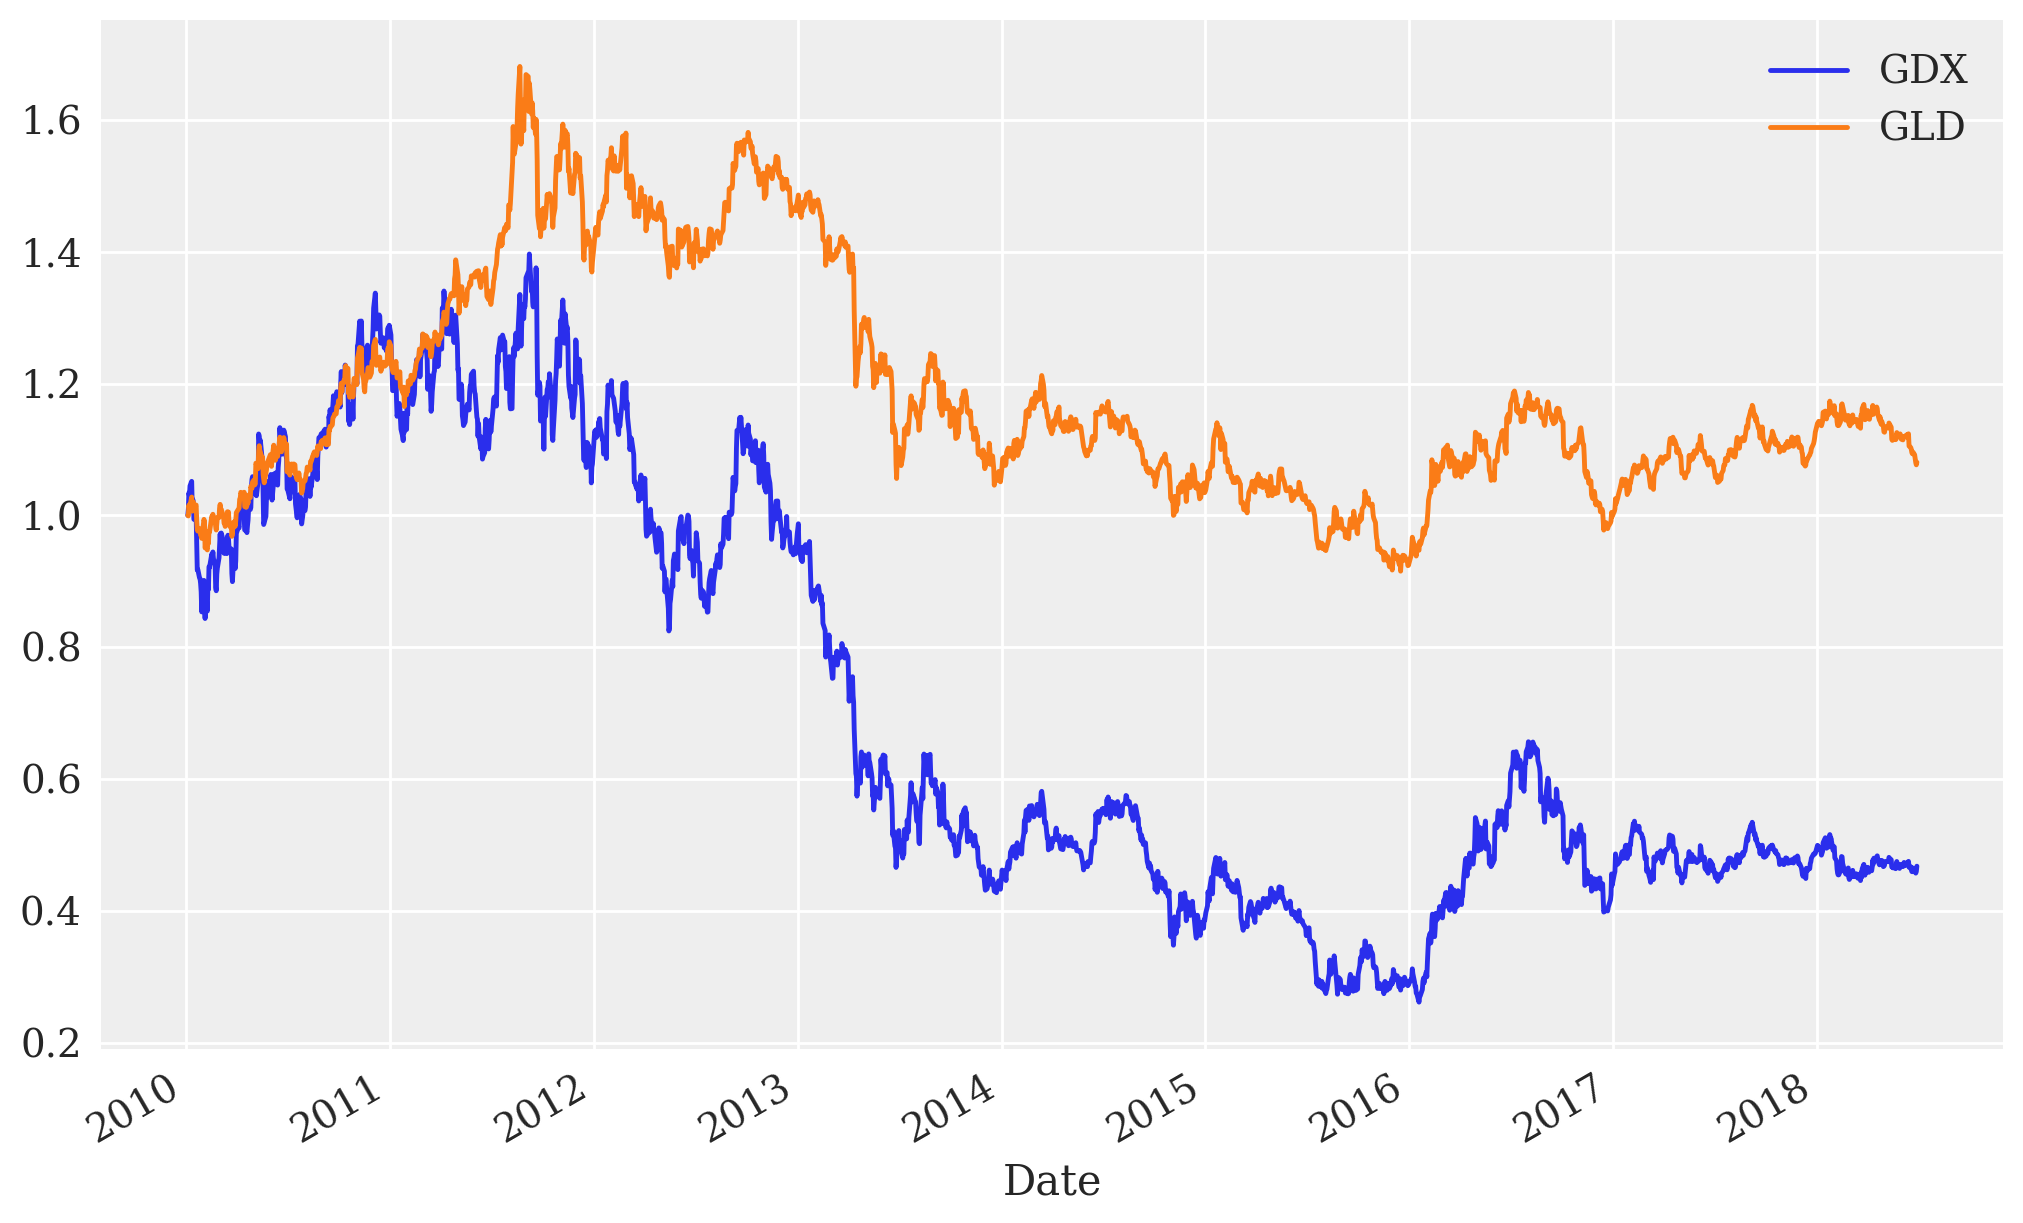

In [ ]:
data.plot(figsize=(10, 6));
# plt.savefig('../../images/ch13/stat_18.png');

In [ ]:
data.index[:3]

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06'], dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
mpl_dates = mpl.dates.date2num(data.index.to_pydatetime())  
mpl_dates[:3]

array([14613., 14614., 14615.])

In [ ]:
eg=data.index.to_pydatetime()[1]
eg

datetime.datetime(2010, 1, 5, 0, 0)

In [ ]:
mpl.dates.date2num(eg)

14614.0

Apologies for the confusion in my previous response. There was a typographical error in the code snippet you provided. The correct method name in `matplotlib.dates` is `date2num`, not `date2mum`.

The `date2num` function in `matplotlib.dates` is used to convert `datetime` objects into their corresponding numeric representation, which is the format that `matplotlib` uses internally to work with dates.

The numeric representation of dates is based on the number of days (including fractions) since a reference date. In `matplotlib`, the reference date is January 1, 0001. Each day is represented by a floating-point number, allowing for sub-day precision. This numeric representation enables `matplotlib` to handle dates in a way that supports plotting and various date-related operations efficiently.

By converting `datetime` objects to their numerical representation using `date2num`, you can use the resulting values with `matplotlib` functions and plots that require numeric inputs for dates, such as time series plots or adding date-related axes to your plots.

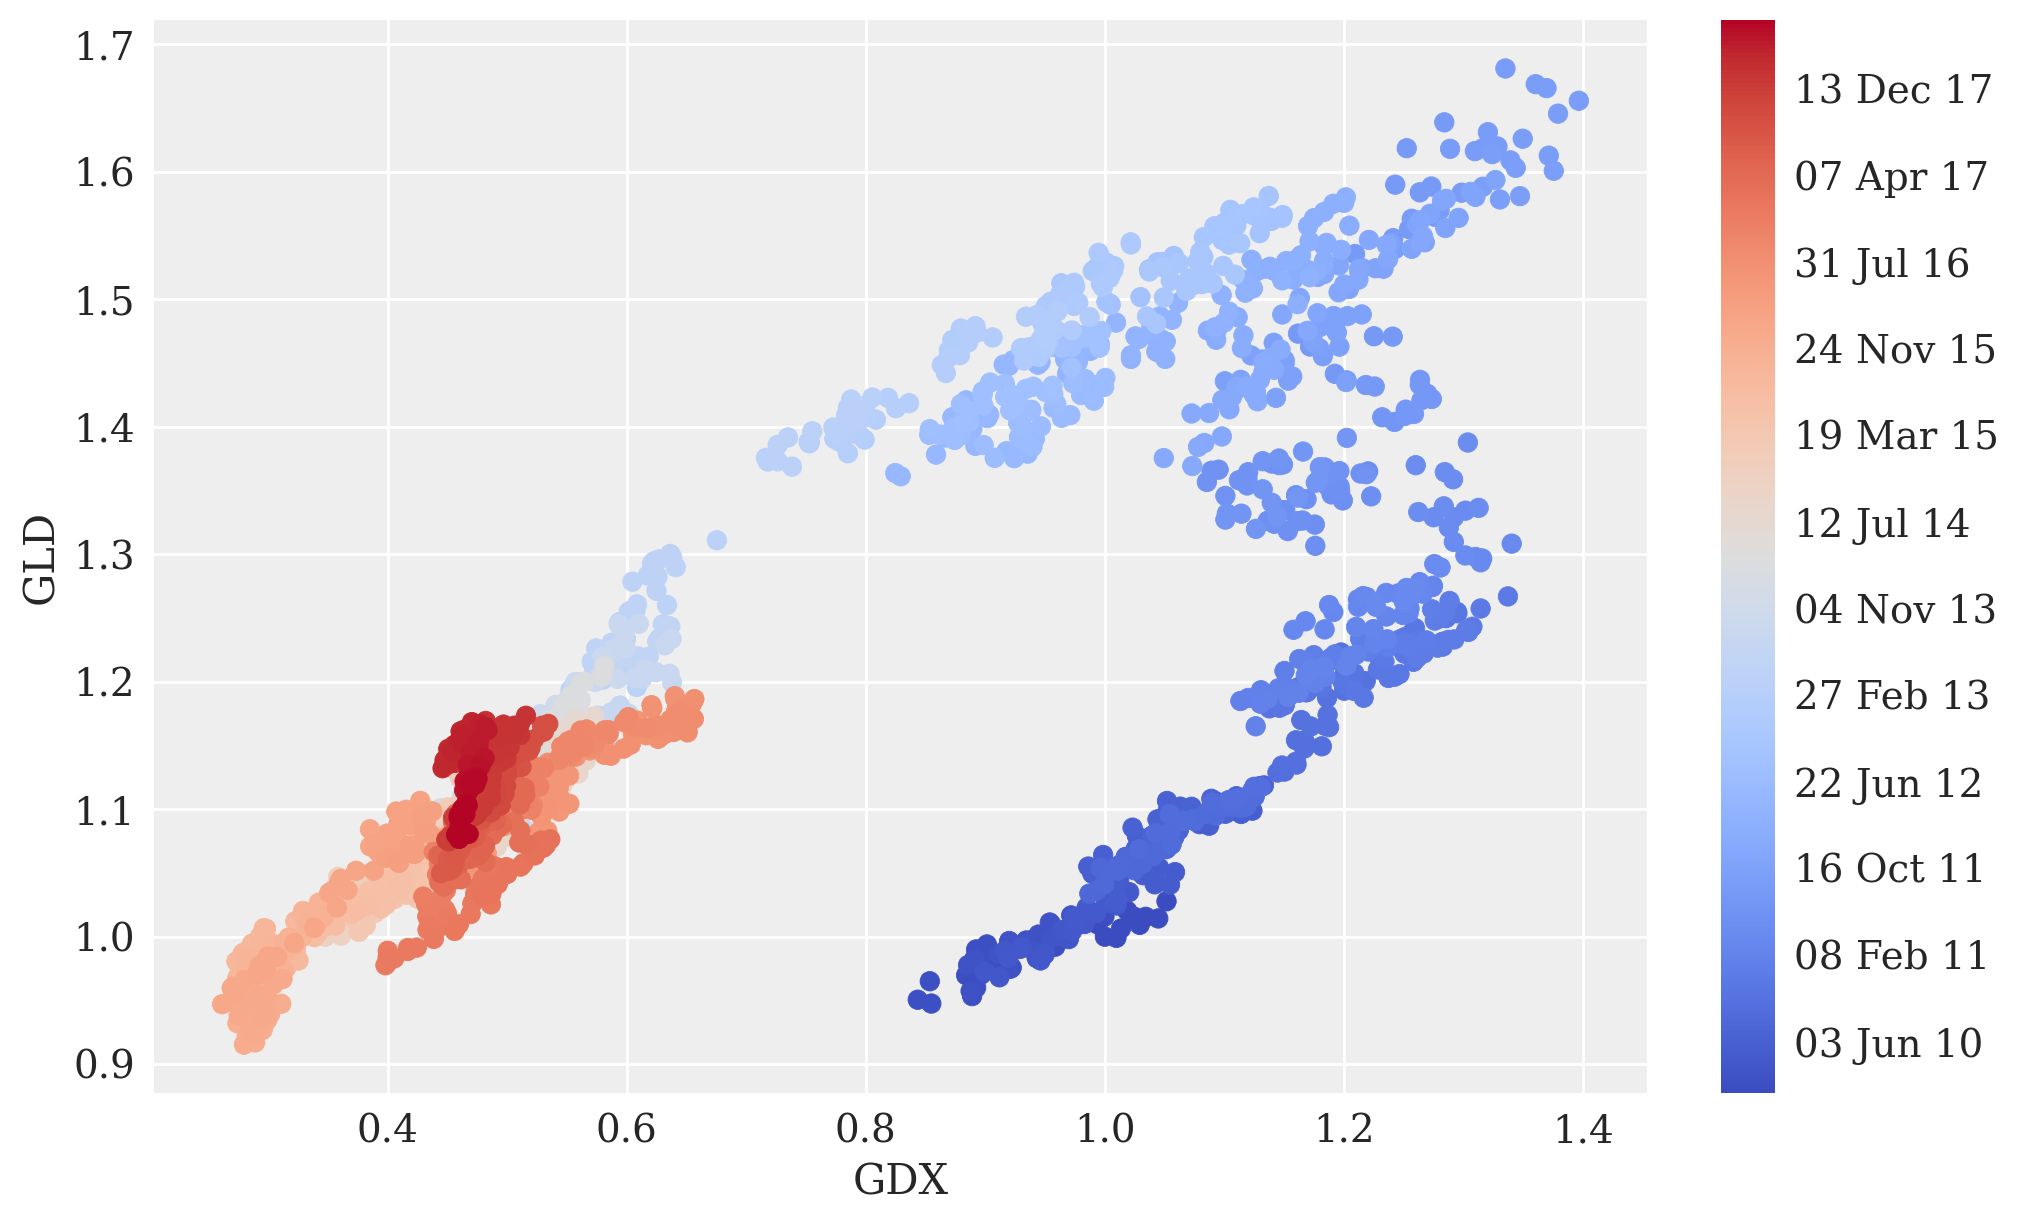

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['GDX'], data['GLD'], c=mpl_dates,
            marker='o', cmap='coolwarm')
plt.xlabel('GDX')
plt.ylabel('GLD')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
             format=mpl.dates.DateFormatter('%d %b %y'));  
# plt.savefig('../../images/ch13/stat_19.png'); # hence here the third demension is time series

In [ ]:
data.index.to_pydatetime? # covert pandas index to python datetime array

In [ ]:
mpl.dates.date2num? # convert python date time obj to matplotlib time

In [ ]:
mpl.dates.DateFormatter?

In [ ]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sigma=20)
    beta = pm.Normal('beta', mu=0, sigma=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    
    y_est = alpha + beta * data['GDX'].values
    
    #likelihood
    Y_obs2 = pm.Normal('Y_obs2', mu=y_est, sigma=sigma,
                           observed=data['GLD'].values)
    
    # start = pm.find_MAP()
    # step = pm.NUTS()
    trace = pm.sample(250, tune=2000,
                      progressbar=True,chains=4)

ERROR:pymc:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [ ]:
az.summary(trace, round_to=3)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  0.914  0.006   0.901    0.925        0.0      0.0   280.357   284.844   
beta   0.385  0.008   0.370    0.402        0.0      0.0   284.020   216.936   
sigma  0.120  0.002   0.116    0.123        0.0      0.0   624.810   446.247   

       r_hat  
alpha  1.016  
beta   1.014  
sigma  1.007

In [ ]:
#pm.summary(trace)  this is the pymc3 way out of date

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  0.914  0.006   0.903    0.925      0.000      0.0     209.0     139.0   
beta   0.385  0.008   0.371    0.400      0.001      0.0     244.0     137.0   
sigma  0.119  0.002   0.116    0.123      0.000      0.0     361.0     281.0   

       r_hat  
alpha   1.02  
beta    1.03  
sigma   1.00

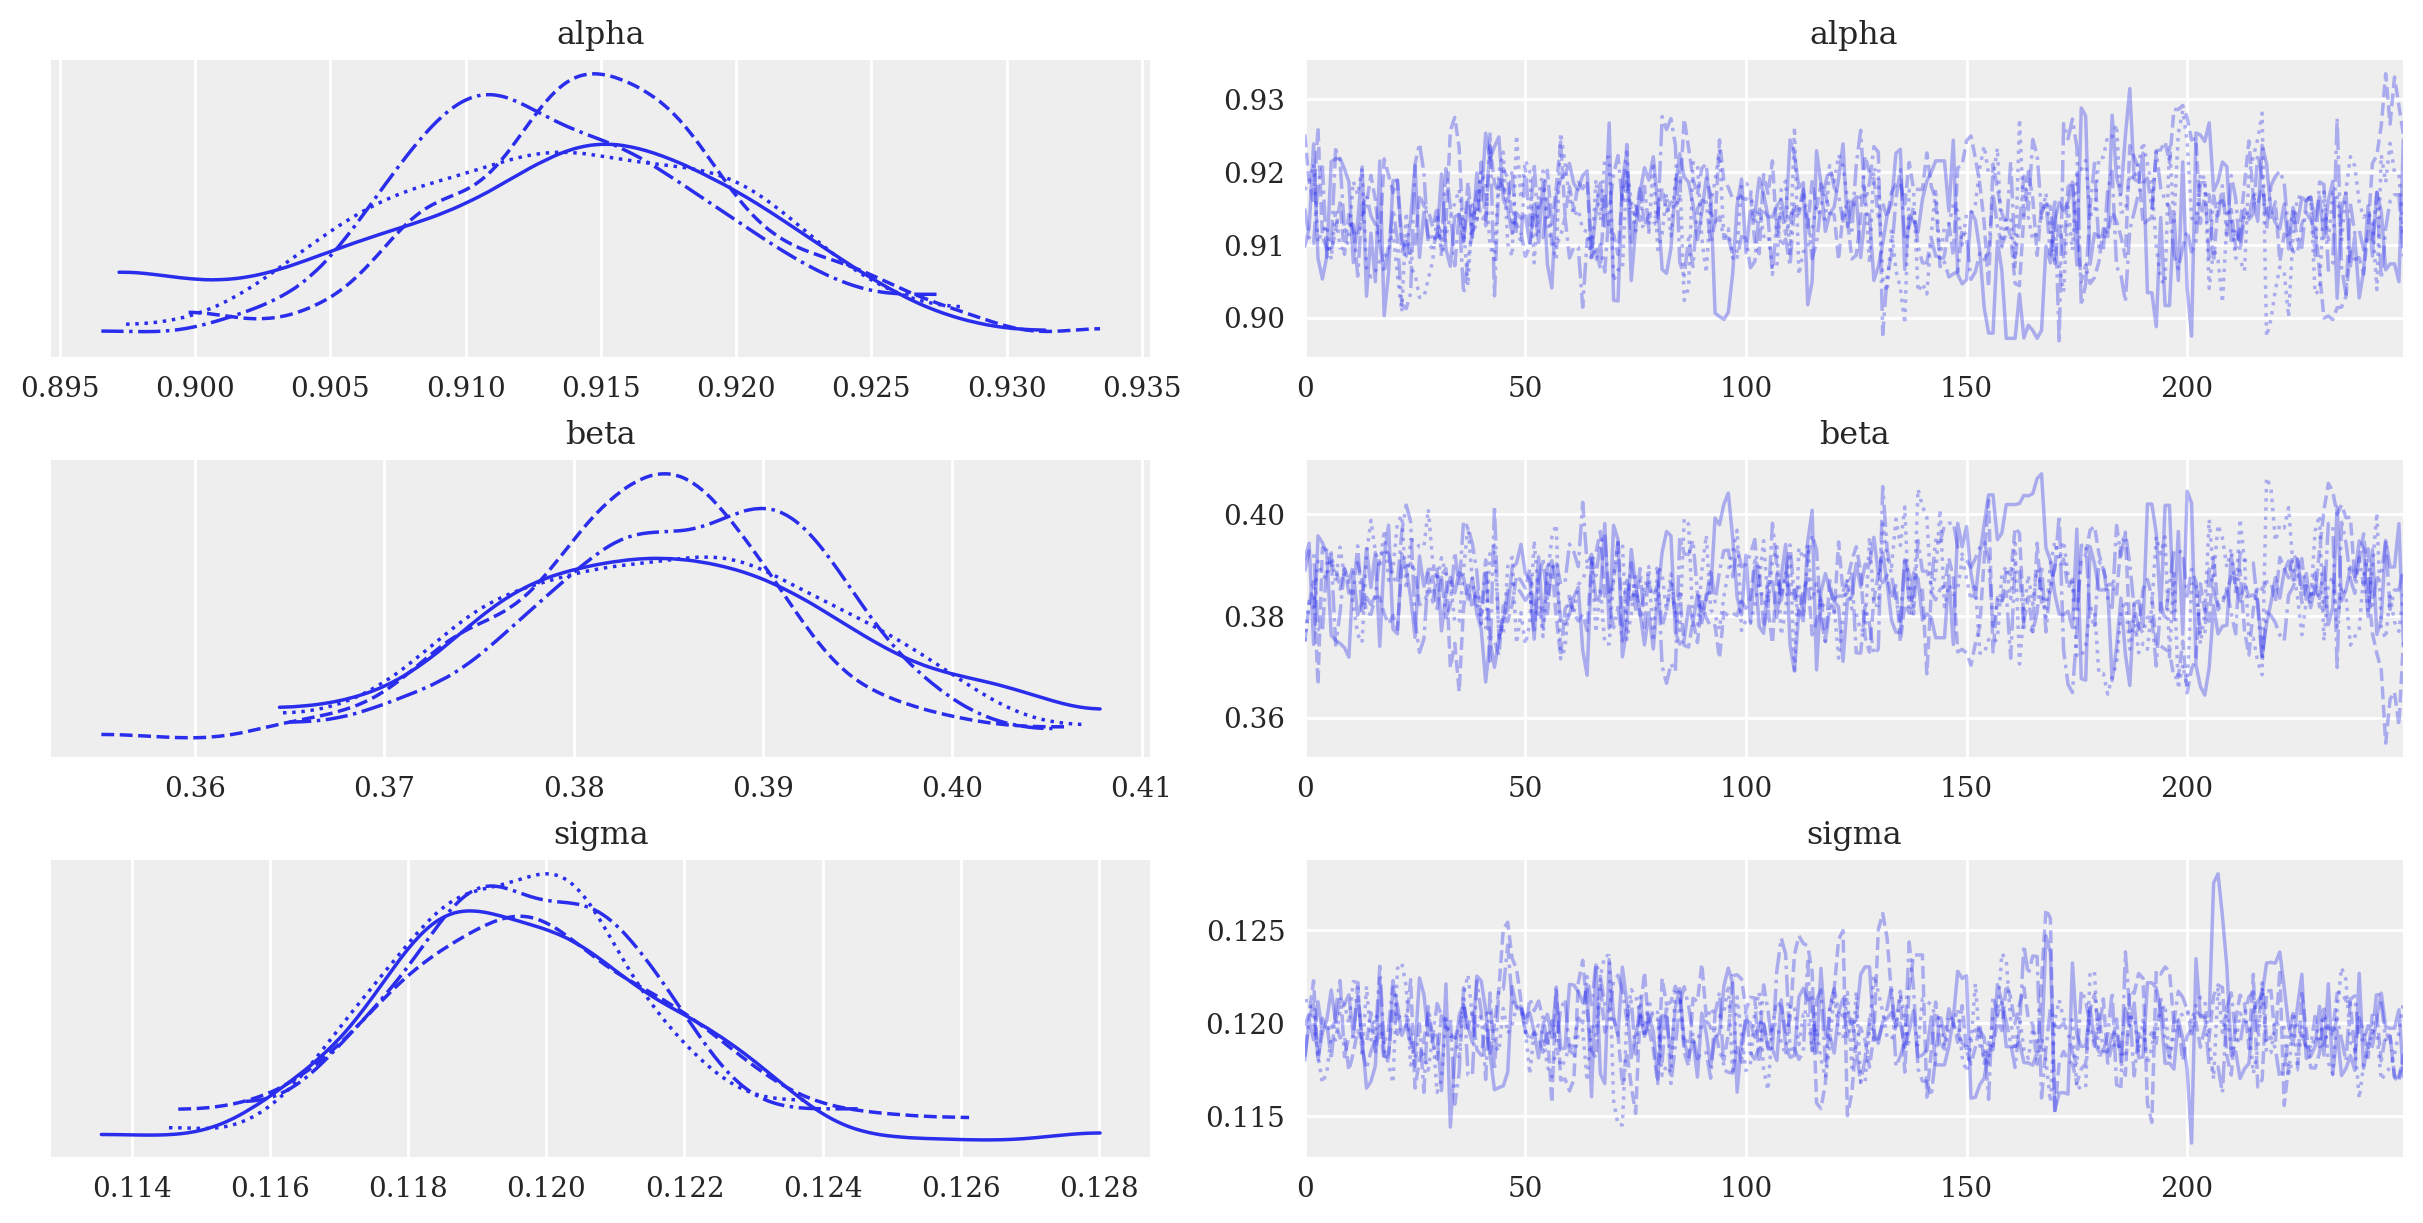

In [ ]:
fig = pm.plot_trace(trace)
# plt.savefig('../../images/ch13/stat_20.png');

In [ ]:
trace.posterior['alpha'].values[1]

array([0.91753679, 0.91867883, 0.92107944, 0.91031173, 0.91193079,
       0.91268673, 0.90800933, 0.91485192, 0.90957497, 0.90947175,
       0.91056039, 0.91870737, 0.916875  , 0.92048324, 0.90682842,
       0.90558424, 0.90638075, 0.90779138, 0.90827345, 0.90939328,
       0.91199259, 0.90571085, 0.90080909, 0.91445368, 0.90687407,
       0.90598411, 0.90278655, 0.90278655, 0.90534421, 0.90778561,
       0.91418867, 0.90841902, 0.91127269, 0.91394586, 0.91573144,
       0.91760329, 0.91232097, 0.90437317, 0.91550886, 0.91340261,
       0.92022132, 0.91836188, 0.90982252, 0.90794667, 0.91993997,
       0.92273072, 0.91014616, 0.90839659, 0.92505697, 0.91630893,
       0.92159308, 0.9200691 , 0.90752121, 0.9165653 , 0.92013037,
       0.91313415, 0.90995781, 0.90799778, 0.92538222, 0.92114982,
       0.9165785 , 0.91396256, 0.91483346, 0.91209709, 0.91179398,
       0.90779312, 0.91896538, 0.91332466, 0.92202126, 0.92202126,
       0.90499413, 0.90659257, 0.90659257, 0.9202947 , 0.91615

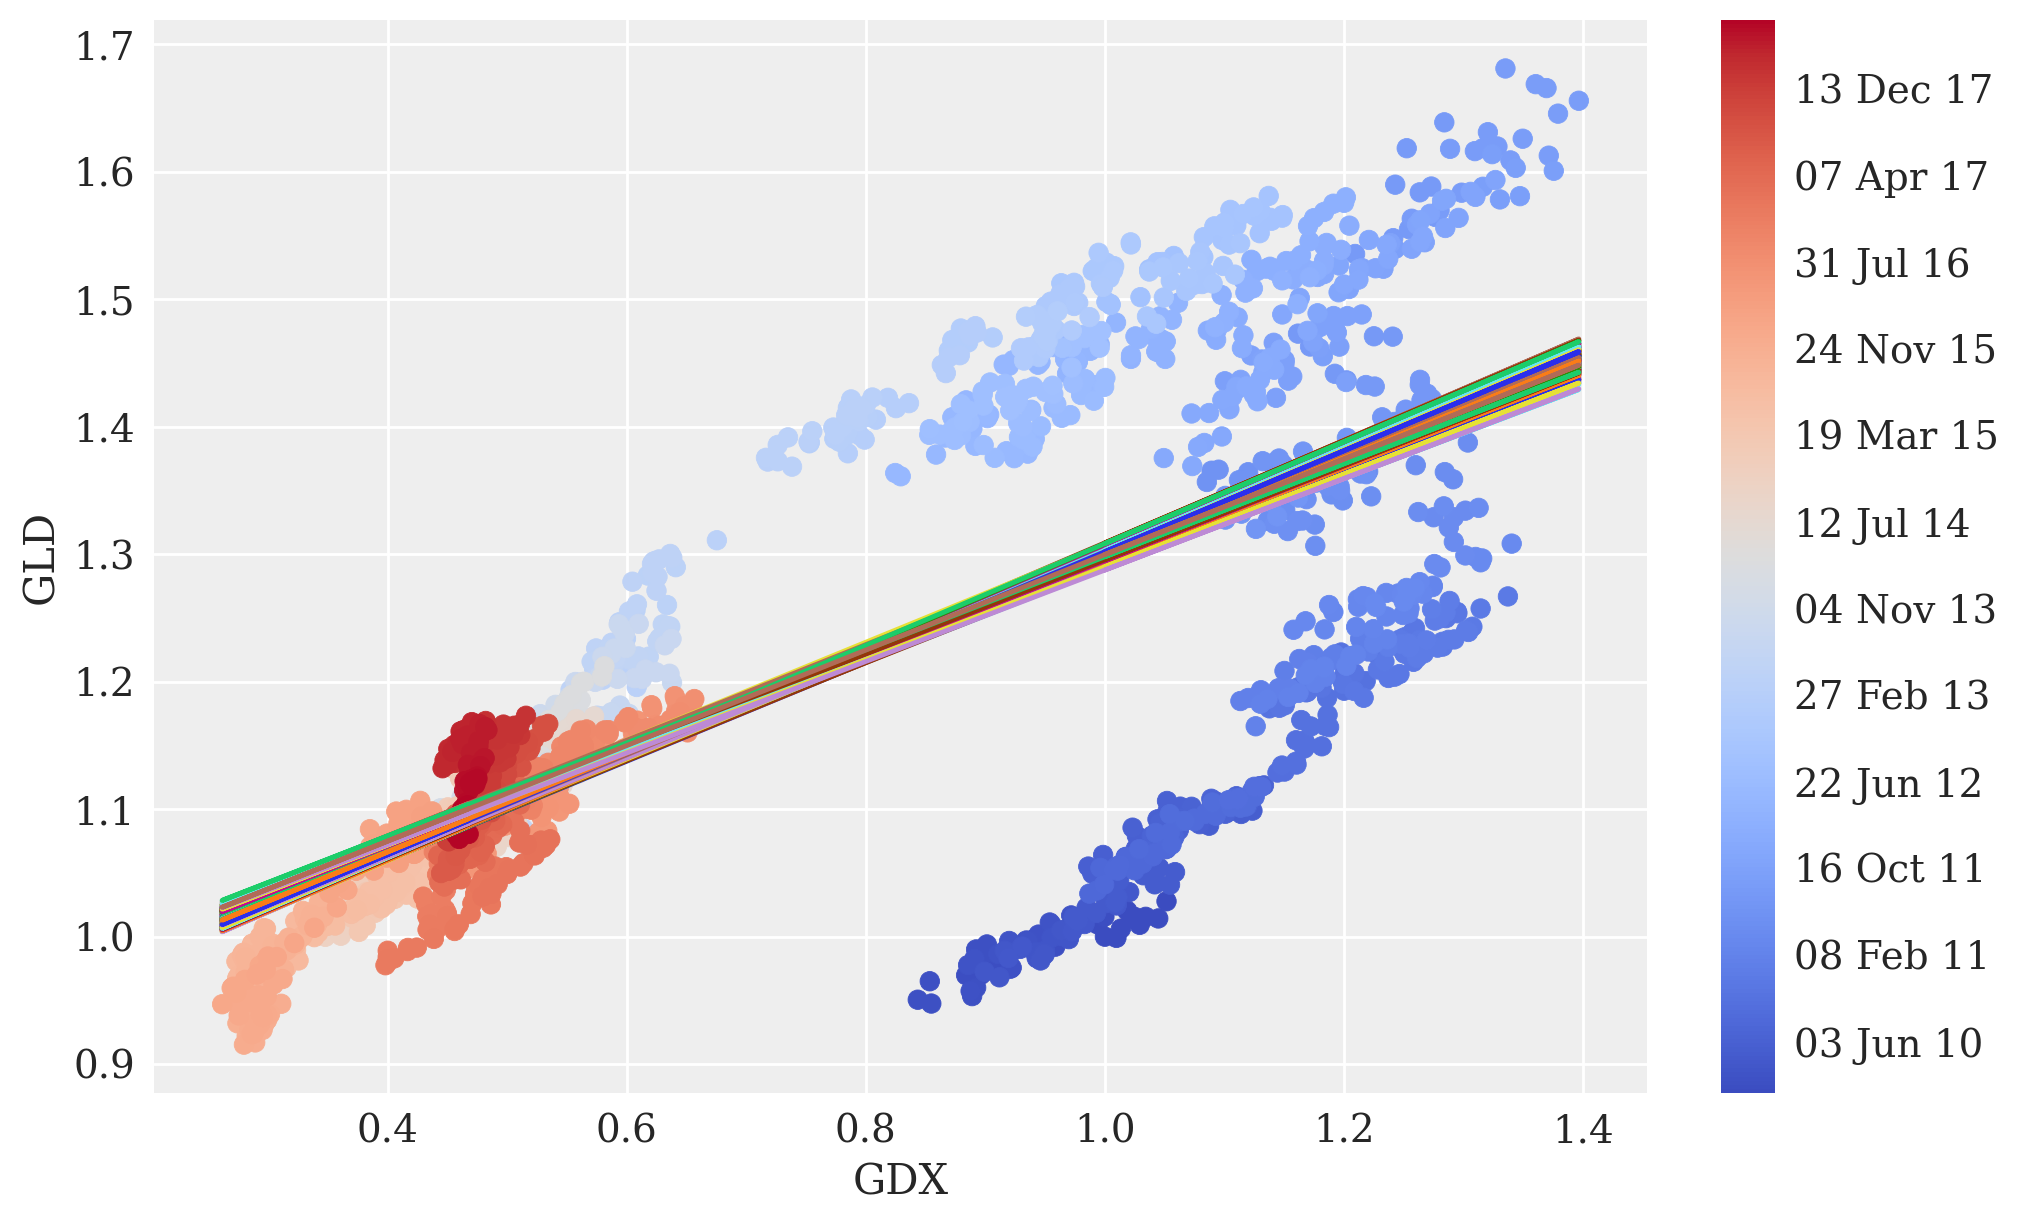

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['GDX'], data['GLD'], c=mpl_dates,
            marker='o', cmap='coolwarm')
plt.xlabel('GDX')
plt.ylabel('GLD')
for i in range(len(trace.posterior['alpha'].values[1])):
    plt.plot(data['GDX'], trace.posterior['alpha'].values[1][i] + trace.posterior['beta'].values[1][i] * data['GDX'])
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
             format=mpl.dates.DateFormatter('%d %b %y'));
for i in range(len(trace.posterior['alpha'].values[1])):
    plt.plot(data['GDX'], trace.posterior['alpha'].values[2][i] + trace.posterior['beta'].values[2][i] * data['GDX']) # we can plot twice to plot 2 chain; hence four chain may need a loop for higher chain demension

# plt.savefig('../../images/ch13/stat_21.png');

now let's add small chunk of regression with time, so unlock the beaysian power among different time frame

In [ ]:
#from pymc3.distributions.timeseries import GaussianRandomWalk  again, pymc3 out of date 

In [ ]:
from pymc.distributions.timeseries import GaussianRandomWalk

In [ ]:
subsample_alpha = 50 # 50 means 50 days will be the interval
subsample_beta = 50

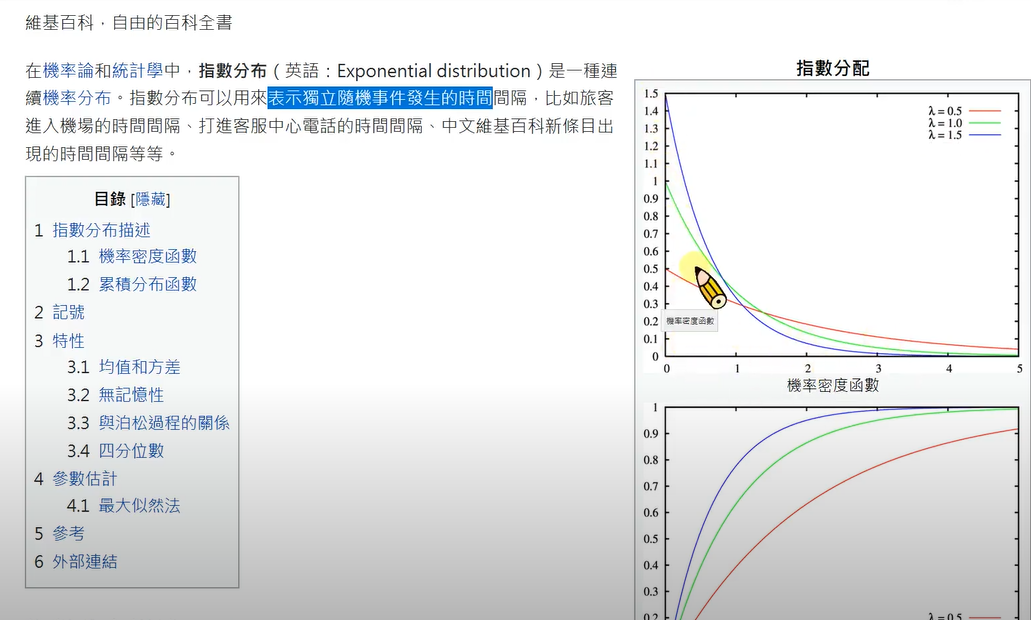

In [ ]:
model_randomwalk = pm.Model()
with model_randomwalk: 
  #defines priors for the random walk paramaters---variant over time
  #testval stands for intial value
    sigma_alpha = pm.Exponential('sig_alpha', 1. / .02, testval=.1) # exponential distribution for independent time series event 
    # 1/.02 =50 lambda with ex with 50 days as interval for prior
    # exponential distribution expectation as (1/lamda)
    # testval=0.1 for the expectation  value 1/50 for the start value of the function
    # expectation is zero though

    # slope sample from exponetial distribution draw as well same process for aphla
    sigma_beta = pm.Exponential('sig_beta', 1. / .02, testval=.1)  


    #model for random walk- for every 50 days
    # 同样的抽样方式只是前抽样由random walk 来表示# below assign the prior paramater  # general timelence/interval > int times alpha and beta
    alpha = GaussianRandomWalk('alpha', sigma_alpha ** -2,
                        shape=int(len(data) / subsample_alpha))                     # here has to be int() for shape ; base on how many days
    beta = GaussianRandomWalk('beta', sigma_beta ** -2,
                        shape=int(len(data) / subsample_beta)) 

    # to duplicate 50 day interval mean will be what left for the last time step
    #Brings the parameter vectors to interval length 
    alpha_r = np.repeat(alpha, subsample_alpha)    #### here is how we use the previous data model the regression/line
    beta_r = np.repeat(beta, subsample_beta)  

    # model that we studied
    regression = alpha_r + beta_r * data['GDX'].values[:2100]  # since total row is 2138, but the random walk only be int %50 hence we end with 2100 very important
    sd = pm.Uniform('sd', 0, 20)  # stand / sigma among data
    likelihood = pm.Normal('GLD', mu=regression, sigma=sd,
                           observed=data['GLD'].values[:2100])  

In [ ]:
GaussianRandomWalk?

In [ ]:
with model_randomwalk:
  trace_rw=pm.sample()

In [ ]:
az.summary(trace_rw, round_to=3) # note 42 for each alpha,beta, # sig_aphla is the inverse number(n-(1/2)) of the exponential sample of the random drift
# we do so to make the random walk has enough random magtitute in its price wise/performace wise action  # note apha_0 number is for each time step

mean        sd    hdi_3%   hdi_97%  mcse_mean   mcse_sd  \
alpha[0]      0.009     0.411    -0.402     0.461      0.290     0.245   
alpha[1]    300.148   248.459    51.742   548.545    174.983   148.028   
alpha[2]    599.474   496.847   102.687  1096.197    349.916   296.013   
alpha[3]    899.359   745.496   154.048  1644.669    525.033   444.154   
alpha[4]   1199.488   994.199   205.537  2193.438    700.187   592.326   
...             ...       ...       ...       ...        ...       ...   
beta[40]   4632.535  1884.990  2748.017  6517.162   1327.547  1123.044   
beta[41]   4749.280  1932.386  2817.377  6681.283   1360.927  1151.282   
sig_alpha     3.762     1.199     2.162     5.214      0.837     0.706   
sig_beta      0.100     0.021     0.078     0.121      0.015     0.013   
sd           20.000     0.000    20.000    20.000      0.000     0.000   

           ess_bulk  ess_tail  r_hat  
alpha[0]      2.308    22.214  3.025  
alpha[1]      2.681    19.087  2.056  
alpha[2]      2.423    10.959  2.504  
alpha[3]      2.805    15.207  1.952  
alpha[4]      2.399    15.724  2.548  
...             ...       ...    ...  
beta[40]      2.388    10.987  2.563  
beta[41]      2.554    16.828  2.239  
sig_alpha     2.594    11.559  2.135  
sig_beta      2.598    11.674  2.204  
sd            2.590    37.746  2.233  

[87 rows x 9 columns]

In [ ]:
az.summary(trace_rw, round_to=3).tail()

mean        sd    hdi_3%   hdi_97%  mcse_mean   mcse_sd  \
beta[40]   4632.535  1884.990  2748.017  6517.162   1327.547  1123.044   
beta[41]   4749.280  1932.386  2817.377  6681.283   1360.927  1151.282   
sig_alpha     3.762     1.199     2.162     5.214      0.837     0.706   
sig_beta      0.100     0.021     0.078     0.121      0.015     0.013   
sd           20.000     0.000    20.000    20.000      0.000     0.000   

           ess_bulk  ess_tail  r_hat  
beta[40]      2.388    10.987  2.563  
beta[41]      2.554    16.828  2.239  
sig_alpha     2.594    11.559  2.135  
sig_beta      2.598    11.674  2.204  
sd            2.590    37.746  2.233

In [ ]:
np.shape(trace_rw.posterior.alpha[1]) # here we access the first chain of it ; note we do each alpha per interval 42 estimate, we did 1000 sample total # of course some of them drop due to stablization see tune first 500 abandon

(1000, 42)

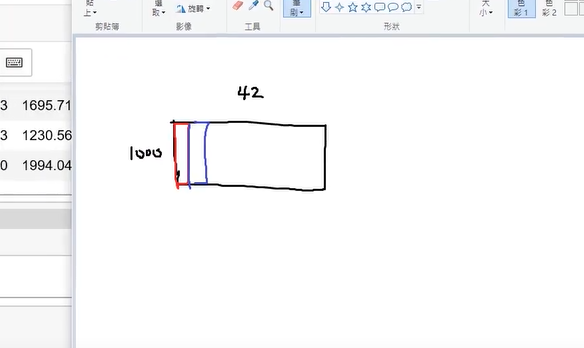  for each of prior alpha and beta given  1000 is the montecarlo 42 is the time step interval; 42 due to 2100 time step after int divd by 50 =42 time step per chain of mante Carlo

In [ ]:
sh=np.shape(trace_rw.posterior.alpha[1])

In [ ]:
#pymc3 old version code

# %%time
# import scipy.optimize as sco
# with model_randomwalk:
#     start = pm.find_MAP(vars=[alpha, beta],
#                         method='L-BFGS-B')
#     step = pm.NUTS(scaling=start)
#     trace_rw = pm.sample(250, tune=1000, start=start,
#                          progressbar=True)

Only 250 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, beta, alpha, sig_beta, sig_alpha]


Sampling 2 chains for 1_000 tune and 250 draw iterations (2_000 + 500 draws total) took 71 seconds.


CPU times: user 22.3 s, sys: 810 ms, total: 23.1 s
Wall time: 1min 34s


In [ ]:
pm.summary(trace_rw).head()  

mean       sd   hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha[0]     0.009    0.411   -0.402     0.461      0.290    0.245       2.0   
alpha[1]   300.148  248.459   51.742   548.545    174.983  148.028       3.0   
alpha[2]   599.474  496.847  102.687  1096.197    349.916  296.013       2.0   
alpha[3]   899.359  745.496  154.048  1644.669    525.033  444.154       3.0   
alpha[4]  1199.488  994.199  205.537  2193.438    700.187  592.326       2.0   

          ess_tail  r_hat  
alpha[0]      22.0   3.03  
alpha[1]      19.0   2.06  
alpha[2]      11.0   2.50  
alpha[3]      15.0   1.95  
alpha[4]      16.0   2.55

In [ ]:
# sh = np.shape(trace_rw['alpha'])  
# sh  

(500, 42)

In [ ]:
sh

(1000, 42)

In [ ]:
mpl_dates

array([14613., 14614., 14615., ..., 17709., 17710., 17711.])

In [ ]:
mpl_dates.shape

(2138,)

In [ ]:
type(dt.datetime.fromordinal(int(14613)))

datetime.datetime

In [ ]:
dt.datetime.fromordinal(int(14613))

datetime.datetime(41, 1, 3, 0, 0)

In [ ]:
# we notice the original code is worng
import matplotlib.dates as mdates
import datetime as dt

mpl_num = 14614.0
dt_obj = mdates.num2date(mpl_num)
dt_obj # this is the right way

datetime.datetime(2010, 1, 5, 0, 0, tzinfo=datetime.timezone.utc)

In [ ]:
part_dates = np.linspace(min(mpl_dates),
                         max(mpl_dates), sh[1]) # divide time by matplot lib # divid by above time step 42 which is 41 interval# we designed a axis for graph
                         # the data ideally should till 2100 not to 2138, here we ignore the diff

In [ ]:
part_dates[:5] # since we divided them

array([14613.        , 14688.56097561, 14764.12195122, 14839.68292683,
       14915.24390244])

In [ ]:
index = [dt.datetime.fromordinal(int(date)) for
        date in part_dates]  # we change it to datetime now ## this code iswrong

In [ ]:
index[:5]

[datetime.datetime(41, 1, 3, 0, 0),
 datetime.datetime(41, 3, 19, 0, 0),
 datetime.datetime(41, 6, 3, 0, 0),
 datetime.datetime(41, 8, 17, 0, 0),
 datetime.datetime(41, 11, 1, 0, 0)]

In [ ]:
import matplotlib
import datetime

In [ ]:
index=0
index = [matplotlib.dates.num2date(int(date)) for
        date in part_dates]

In [ ]:
index[:5]

[datetime.datetime(2010, 1, 4, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2010, 3, 20, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2010, 6, 4, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2010, 8, 18, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2010, 11, 2, 0, 0, tzinfo=datetime.timezone.utc)]

In [ ]:
dt.datetime.fromordinal?

In [ ]:
trace_rw.posterior.alpha[1]

array([[ 3.86174062e-01,  5.17568210e+01,  1.02772948e+02, ...,
        -2.94413284e+03, -2.97746022e+03, -2.99105385e+03],
       [ 3.85942497e-01,  5.17569720e+01,  1.02773341e+02, ...,
        -2.94308926e+03, -2.97668784e+03, -2.98863175e+03],
       [ 3.85991486e-01,  5.17570677e+01,  1.02773461e+02, ...,
        -2.94312029e+03, -2.97716527e+03, -2.98905616e+03],
       ...,
       [ 4.14505026e-01,  5.17563499e+01,  1.02678276e+02, ...,
        -2.94295135e+03, -2.97620731e+03, -2.98928016e+03],
       [ 4.13174008e-01,  5.17574981e+01,  1.02675686e+02, ...,
        -2.94185912e+03, -2.97546535e+03, -2.98874597e+03],
       [ 4.12711835e-01,  5.17567906e+01,  1.02678334e+02, ...,
        -2.94190068e+03, -2.97511591e+03, -2.98949523e+03]])

In [ ]:
alpha = {'alpha_%i' % i: v for i, v in
         enumerate(trace_rw.posterior.alpha[1]) if i < 20}  

In [ ]:
beta = {'beta_%i' % i: v for i, v in
         enumerate(trace_rw.posterior.beta[1]) if i < 20}  

In [ ]:
df_alpha = pd.DataFrame(alpha, index=index)  

In [ ]:
df_beta = pd.DataFrame(beta, index=index)  

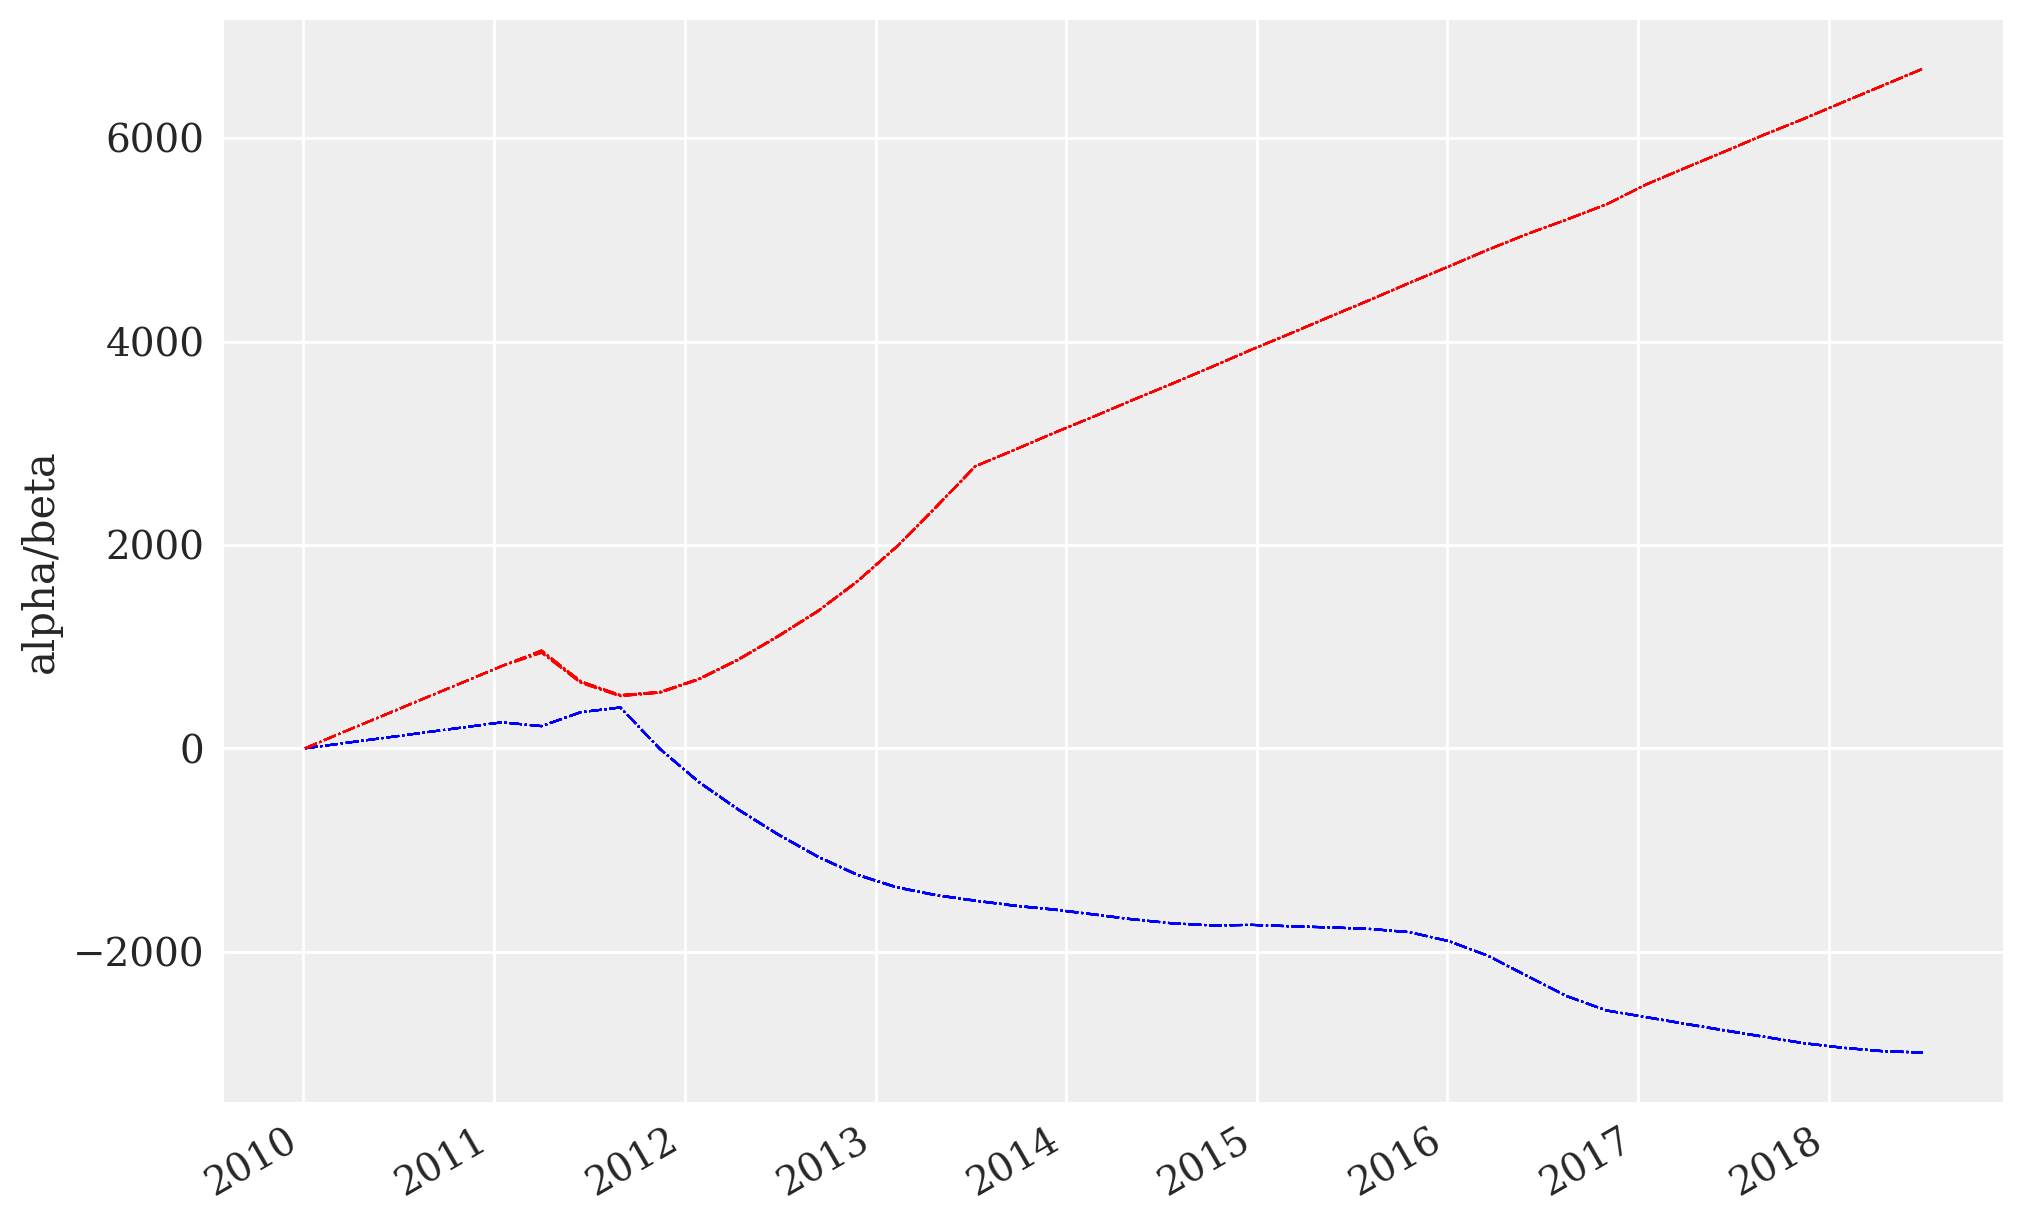

In [ ]:
ax = df_alpha.plot(color='b', style='-.', legend=False,
                   lw=0.7, figsize=(10, 6))
df_beta.plot(color='r', style='-.', legend=False,
             lw=0.7, ax=ax)
plt.ylabel('alpha/beta');
# plt.savefig('../../images/ch13/stat_22.png');

ValueError: ignored

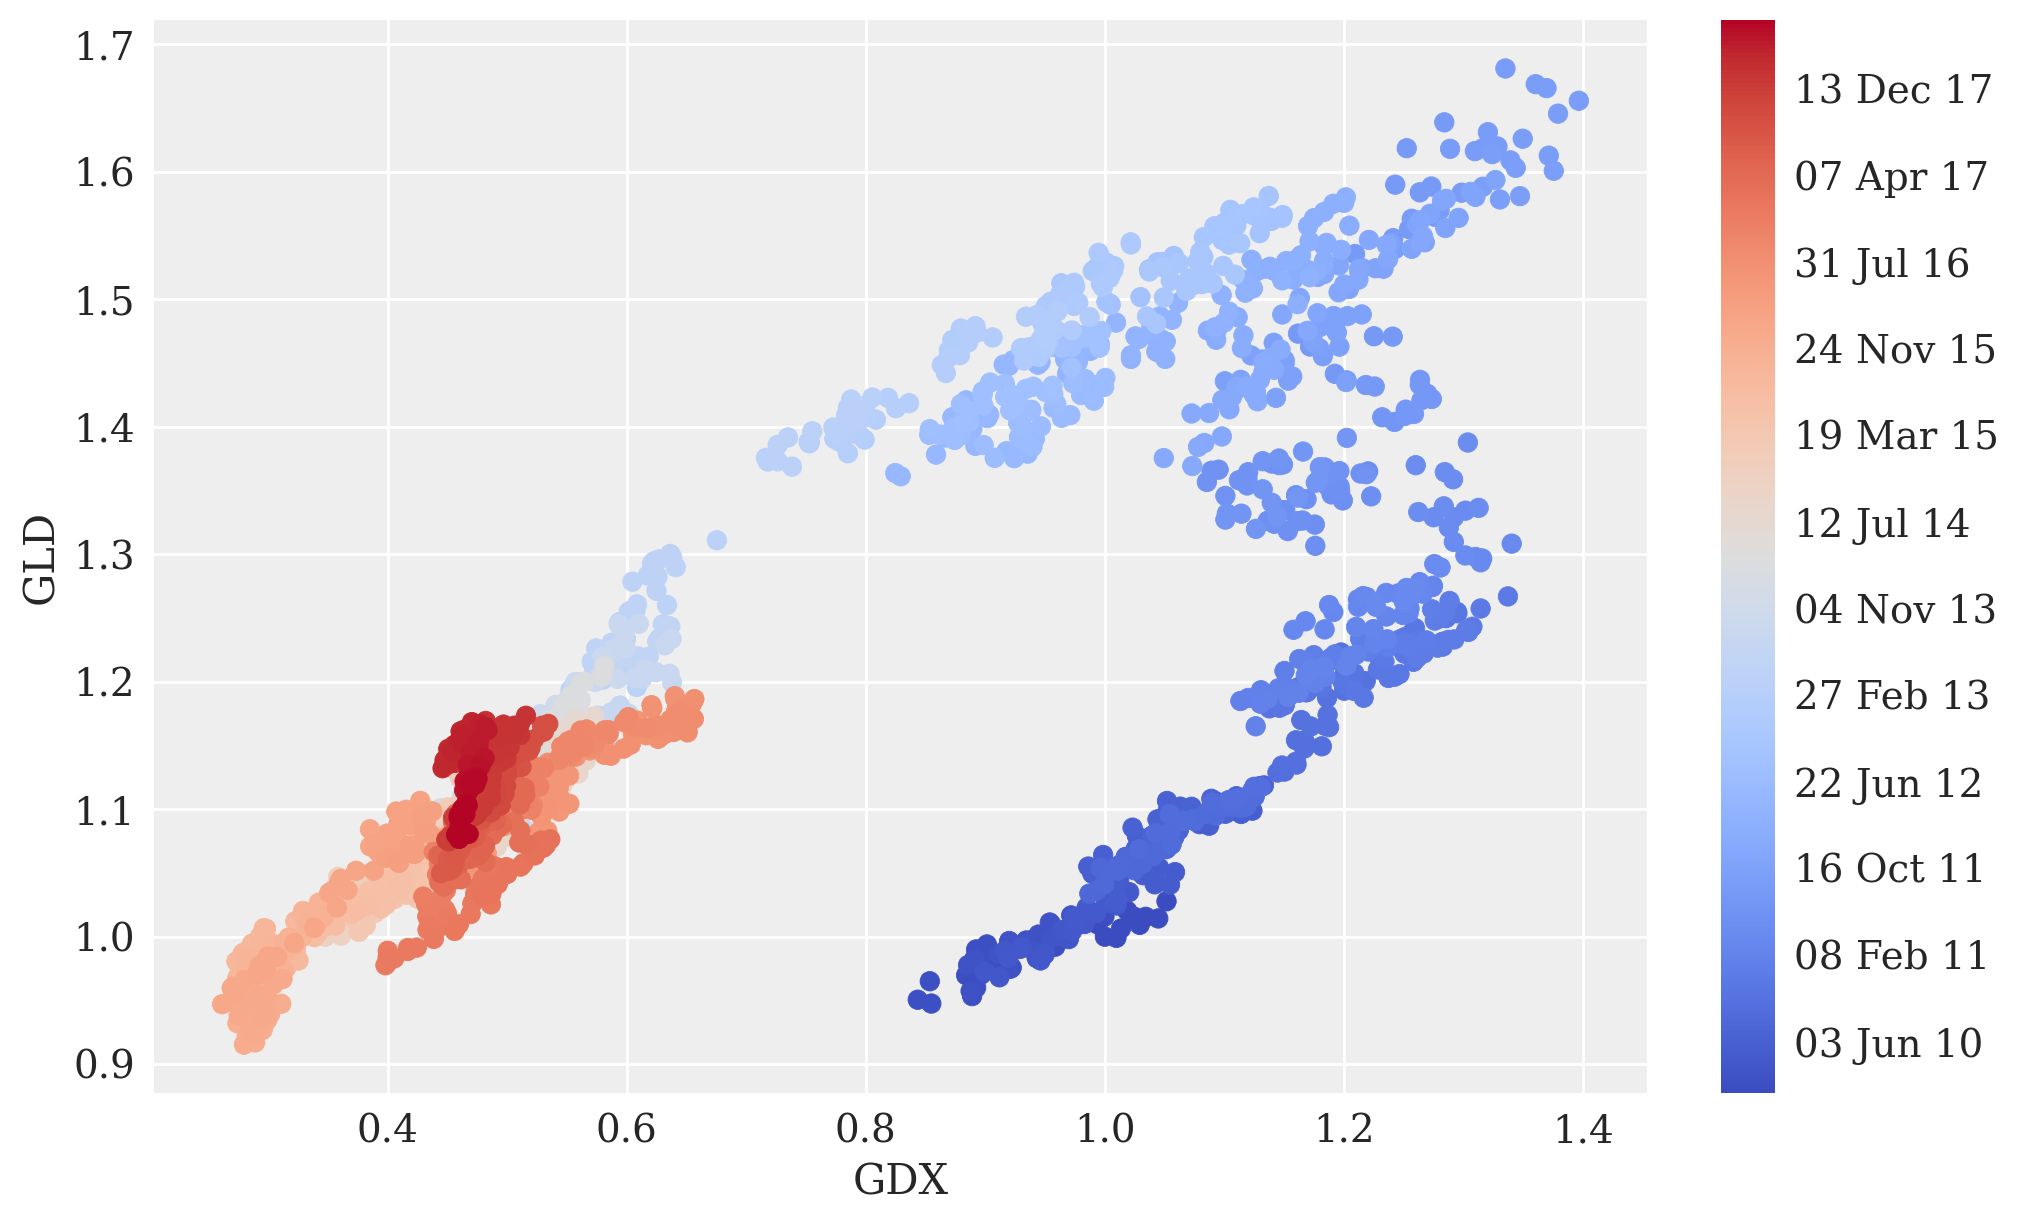

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['GDX'], data['GLD'], c=mpl_dates,
            marker='o', cmap='coolwarm')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
             format=mpl.dates.DateFormatter('%d %b %y'))
plt.xlabel('GDX')
plt.ylabel('GLD')
x = np.linspace(min(data['GDX']), max(data['GDX']))
for i in range(sh[1]):  
    alpha_rw = np.mean(trace_rw.posterior.alpha[1].T[i])
    beta_rw = np.mean(trace_rw.posterior.beta[1].T[i])
    plt.plot(x, alpha_rw + beta_rw * x, '--', lw=0.7,
            color=plt.cm.coolwarm(i / sh[1]))
# plt.savefig('../../images/ch13/stat_23.png');